Zachary Neveu

In [2]:
pkg load statistics
pkg load control
pkg load communications

# Gaussian Signal in Gaussian Noise (both $\mu = 0$)

## i)

$$H_1: Y = z \sim N(0, \sigma_Z^2)$$
$$H_2: Y = A \sim N(0, \sigma_A^2) + z \sim N(0, \sigma_Z^2) \rightarrow Y \sim N(0+0, \sigma_z^2 + \sigma_A^2)$$


As the two signals have the same mean but different variances, there will be two decision boundaries, $\gamma$, symmetric around the y axis.

$$\gamma = P(H_1 | y) \gtrless P(H_2 | y)$$  
$$\gamma = \frac{1}{\sqrt{2\pi \sigma_z^2}} e^{\frac{-y^2}{2\sigma_z^2}} \gtrless
\frac{1}{\sqrt{2\pi (\sigma_A^2+\sigma_Z^2)}} e^{\frac{-y^2}{2(\sigma_A^2 + \sigma_Z^2)}}$$

$$\gamma = e^{y^2(\frac{1}{2\sigma_z^2} + \frac{1}{2(\sigma_A^2+\sigma_z^2)})} \gtrless \frac{\sigma_z^2}{\sigma_z^2 + \sigma_z^2}$$

$$\gamma = y^2(\frac{1}{2\sigma_z^2} + \frac{1}{2(\sigma_A^2+\sigma_z^2)}) \gtrless ln(\frac{\sigma_z^2}{\sigma_z^2 + \sigma_z^2})$$

\begin{equation}
\gamma = |y| \gtrless \sqrt{\frac{\sigma_z^2 (\sigma_z^2 + \sigma_A^2)}{\sigma_z^2 - (\sigma_z^2 + \sigma_A^2)} ln(\frac{\sigma_z^2}{\sigma_z^2 + \sigma_A^2})}
\end{equation}

## ii)

If $\frac{\sigma_A^2}{\sigma_z^2} = 10dB = 10$, $\sigma_A^2 = \sigma_z^2 * 10$.  Substituting into Eq. 1, this gives:

$$\gamma = |y| \gtrless \sqrt{\frac{\sigma_z^2 (\sigma_z^2 + \sigma_z^2*10)}{\sigma_z^2 - (\sigma_z^2 + \sigma_z^2*10)} ln(\frac{\sigma_z^2}{\sigma_z^2 + \sigma_z^2*10})}$$

$$\gamma = |y| \gtrless \sqrt{-11/10 \sigma_z^2 * ln(\frac{1}{11})}$$  

In [32]:
SNRdB = 10;
sigmazsq = 1;
sigmaasq = sigmazsq * 10^(SNRdB / 10);
gamma = sqrt(log(1+sigmaasq/sigmazsq) / -(1/(sigmaasq+sigmazsq) - 1/sigmazsq))

gamma =  1.6241


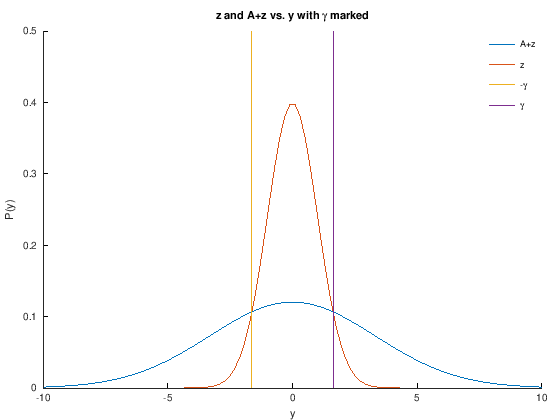

In [45]:
hold on
r = linspace(-10, 10);
plot(r, normpdf(r, 0, sqrt(sigmaasq+sigmazsq)), 'DisplayName', 'A+z')
plot(r, normpdf(r, 0, sqrt(sigmazsq)), 'DisplayName', 'z')
plot([-gamma -gamma], [0, 0.5], 'DisplayName', '-\gamma')
plot([gamma, gamma], [0, 0.5], 'DisplayName', '\gamma')
title('z and A+z vs. y with \gamma marked')
xlabel('y')
ylabel('P(y)')
legend()
legend('boxoff')

Looking at the above graph, $P_{FA}$ is the area under the red line outside of $[-\gamma, \gamma]$. Since the area under tails of gaussians are described by the Q function, this could be described by $P_{FA} = 2*Q(\gamma / \sigma_z^2)$.  $P_{MD}$ is the area under the blue curve in the region $[-\gamma, \gamma]$. This can be described by $P_{MD} = 1 - 2*Q(\frac{\gamma}{\sigma_z^2 + \sigma_A^2})$.  This leaves $P_e = P_{MD} * P_1 + P_{FA} * P_0 = \frac{1}{2}[2Q(\frac{\gamma}{\sigma_z^2}) + 1 - 2Q(\frac{\gamma}{\sigma_z^2+\sigma_A^2})]$

## iii)

In [46]:
function [PFA, PMD] = error(SNRdB)
    sigmazsq = 1;
    sigmaasq = sigmazsq * 10^(SNRdB / 10);
    gamma = sqrt(log(1+sigmaasq/sigmazsq) / -(1/(sigmaasq+sigmazsq) - 1/sigmazsq));
    PFA = 2*qfunc(gamma / sigmazsq);
    PMD = 1 - 2*qfunc(gamma / (sigmazsq + sigmaasq));
end

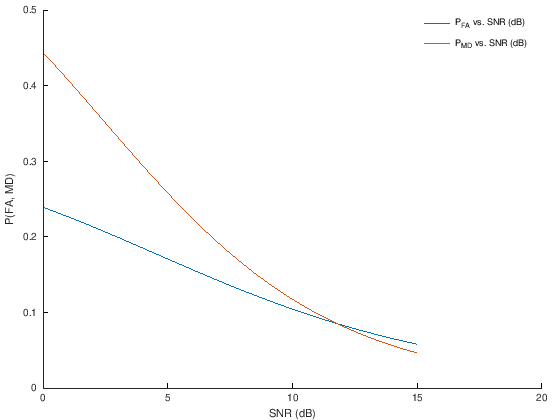

In [48]:
r = linspace(0, 15);
[PFAs, PMDs] = arrayfun(@error, r);
hold on
plot(r, PFAs, 'DisplayName', 'P_{FA} vs. SNR (dB)')
plot(r, PMDs, 'DisplayName', 'P_{MD} vs. SNR (dB)')
xlabel('SNR (dB)')
ylabel('P(FA, MD)')
legend()
legend('boxoff')

# Signal in Laplacian Noise

### i)
If a PDF, $f_1$, is symettric around 0, then $f_1(x) = f_1(x-A)$ if $x = A/2$.  The laplacian distribution is symmetrical, because for all $z$, $\frac{\lambda}{2}e^{-\lambda |z|} = \frac{\lambda}{2}e^{-\lambda |-z|}$.  We can then say that for the ML detection rule, the decision boundary, $\gamma = A/2$.  This is supported by Fig. 2, showing a laplace distribution, a copy of it shifted by $A$, and the proposed decision boundary, $\gamma$, which falls at the intersection of the distributions.

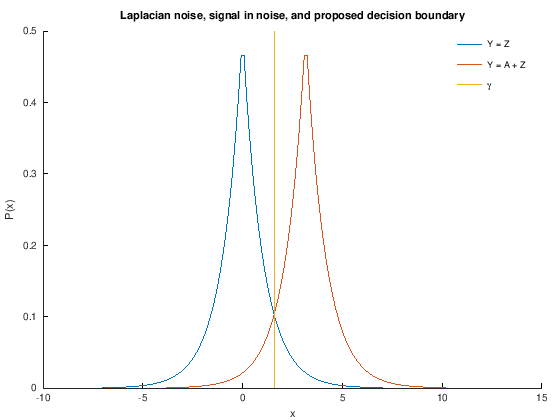

In [2]:
r = linspace(-7,7);
A = db2mag(10);
hold on
plot(r, laplace_pdf(r), 'DisplayName', 'Y = Z')
plot(r+A, laplace_pdf(r), 'DisplayName', 'Y = A + Z')
plot([A/2 A/2], [0, 0.5], 'DisplayName', '\gamma')
title('Laplacian noise, signal in noise, and proposed decision boundary')
xlabel('x')
ylabel('P(x)')
legend()
legend('boxoff')

### ii)
To get $P_{FA}$ and $P_{MD}$ it is simply necessary to calculate the area under the overlapping tails of the laplace distributions.  This could be done by solving $P_{FA} = \int_{-\infty}^{A/2} \frac{\lambda}{2}e^{-\lambda |z|} dz$. Note that the tails are symmetrical, so $P_{MD} = P_{FA}$.  Here we are simply using Matlab's `laplace_cdf()` function as it makes plotting and calculating easier.

In [3]:
A = db2mag(10);
pfa = 1 - laplace_cdf(A/2)
pmd = laplace_cdf(-A/2)
pe = pfa + pmd

pfa =  0.10287
pmd =  0.10287
pe =  0.20574


### iii)

In [4]:
snrs = linspace(0, 15);
as = db2mag(snrs);
pfas = laplace_cdf(-1 .* as ./ 2);
pmds = pfas;

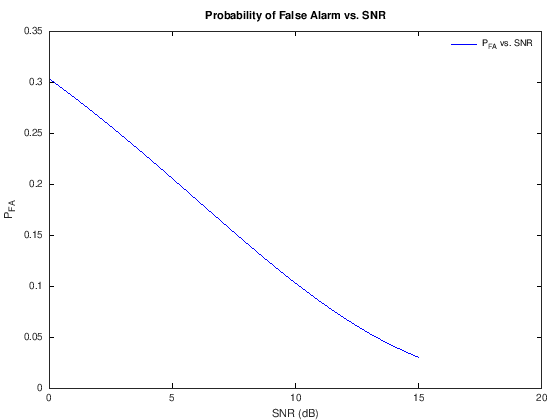

In [5]:
plot(snrs, pfas, 'b', 'DisplayName', 'P_{FA} vs. SNR')
title('Probability of False Alarm vs. SNR')
xlabel('SNR (dB)')
ylabel('P_{FA}')
legend()
legend('boxoff')

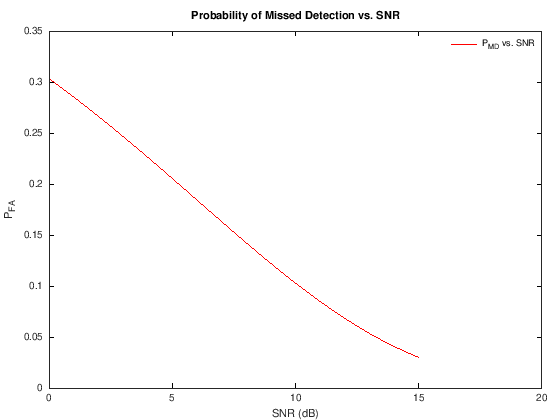

In [6]:
plot(snrs, pmds, 'r', 'DisplayName', 'P_{MD} vs. SNR')
title('Probability of Missed Detection vs. SNR')
xlabel('SNR (dB)')
ylabel('P_{FA}')
legend()
legend('boxoff')

# MAP and ML comparison with Signal in Gaussian Noise and $P_0 \ne P_1$
From Homework 1, $P_{FA} = P_{MD} = Q(\frac{1}{2} \sqrt{SNR})$, so for ML detection at 3dB, 

In [3]:
SNRdB = 3;
PFA = qfunc(0.5 * sqrt(10^(SNRdB / 10)))
PMD = PFA

PFA =  0.24001
PMD =  0.24001


Using MAP detection, $\gamma = \frac{f_1(y)}{f_0(y)} = \frac{P_0}{P_1}$, so with $P_0 = 0.3$ and $P_1 = 0.7$, $\gamma = \frac{f_1(y)}{f_0(y)} = 3/7$.  In class, we showed that this can be expanded and simplified to get
$$\gamma = y \gtrless \frac{A}{2} + \frac{\sigma_z^2}{A}ln(\frac{P_0}{P_1})$$

$P_{FA}$ can then be written as 
$$P_{FA} = Q(\gamma) = Q(\frac{A}{2} + \frac{\sigma_z^2}{A}ln(\frac{P_0}{P_1})) = Q(\frac{\sqrt{SNR}}{2} + \frac{1}{\sqrt{SNR}}ln(\frac{P_0}{P_1}))$$

The final term of this equation is the amount that $\gamma$ was shifted by the prior probabilities, so $P_{MD}$ is the same equation with the shift in the opposite direction, 
$$Q(\frac{\sqrt{SNR}}{2} - \frac{1}{\sqrt{SNR}}ln(\frac{P_0}{P_1}))$$

In [4]:
SNRdB = 3;
A = db2mag(SNRdB);
P0 = .3;
sigmasq = 1;
SNR = 10^(SNRdB / 10);
gamma = A/2 + (sigmasq / A) * log(P0/(1-P0))
PFA_MAP = qfunc(sqrt(SNR) / 2 + 1 / sqrt(SNR) * log(P0/(1-P0)))
PMD_MAP = qfunc(sqrt(SNR) / 2 - 1 / sqrt(SNR) * log(P0/(1-P0)))

gamma =  0.10643
PFA_MAP =  0.45762
PMD_MAP =  0.095758


An interesting way to visualize how MAP detection is different from ML detection is to plot the two distributions scaled by the probability that they occur so that the total area under both distributions sums to 1.  $\gamma_{MAP}$ will then fall at the intersection of the two distributions, whereas $\gamma_{ML}$ will not fall at this intersection, making for a sub-optimal $P_e$.

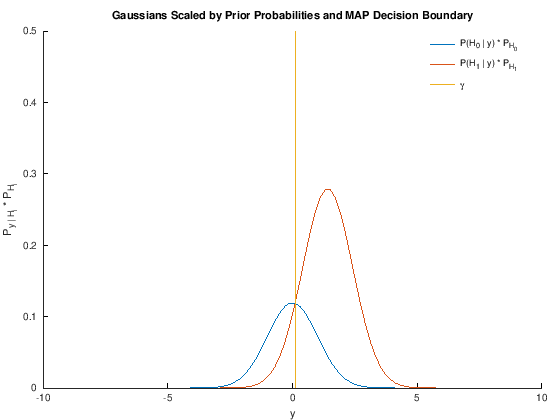

In [7]:
r = linspace(-10, 10);
hold on
plot(r, P0 *normpdf(r, 0, sqrt(sigmasq)), 'DisplayName', 'P(H_0 | y) * P_{H_0}')
plot(r, (1-P0)*normpdf(r, A, sqrt(sigmasq)), 'DisplayName', 'P(H_1 | y) * P_{H_1}')
plot([gamma gamma], [0 0.5], 'DisplayName', '\gamma')
title('Gaussians Scaled by Prior Probabilities and MAP Decision Boundary')
xlabel('y')
ylabel('P_{y | H_i} * P_{H_i}')
legend()
legend('boxoff')

# MAP Detection with Incorrect Prior Probabilities

If $P_0$ and $P_1$ are estimated, and are not correct, the MAP classifier will not minimize $P_e$ and the shifted decision boundary will disproportionately effect either $P_{FA}$ or $P_{MD}$. $P_{FA} = P(H_1 | H_0)$, which does not depend on $P_0$ and $P_1$, so $P_{FA}$ is determined by our guess and where $\gamma$ is set. $P_e$, however, will suffer from the incorrect guess, in this case increasing by 4.462% over $P_e$ if $P_0$ was known.

In [49]:
SNRdB = 3;
A = db2mag(SNRdB);
P0 = 0.3;
P0guess = 0.1;
sigmasq = 1;
SNR = 10^(SNRdB / 10);
gamma = A/2 + (sigmasq / A) * log(P0guess/(1-P0guess))
PFA_guess = qfunc(sqrt(SNR) / 2 + 1 / sqrt(SNR) * log(P0guess/(1-P0guess)))
PMD_guess = qfunc(sqrt(SNR) / 2 - 1 / sqrt(SNR) * log(P0guess/(1-P0guess)))
PE_guess = PFA_guess * P0 + PMD_guess * (1-P0)
PE_min = PFA_MAP * P0 + PMD_MAP * (1-P0)
delta_PE = PE_guess - PE_min

gamma = -0.84925
PFA_guess =  0.80213
PMD_guess =  0.011855
PE_guess =  0.24894
error: 'PFA_MAP' undefined near line 1 column 10
error: 'PE_min' undefined near line 1 column 23


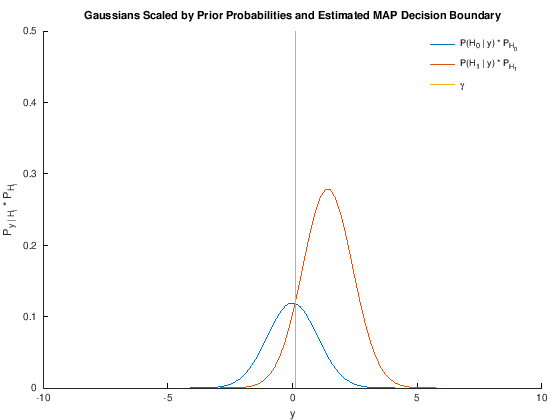

In [8]:
r = linspace(-10, 10);
hold on
plot(r, P0 * normpdf(r, 0, sqrt(sigmasq)), 'DisplayName', 'P(H_0 | y) * P_{H_0}')
plot(r, (1-P0) * normpdf(r, A, (sigmasq)), 'DisplayName', 'P(H_1 | y) * P_{H_1}')
plot([gamma gamma], [0 0.5], 'DisplayName', '\gamma')
title('Gaussians Scaled by Prior Probabilities and Estimated MAP Decision Boundary')
xlabel('y')
ylabel('P_{y | H_i} * P_{H_i}')
legend()
legend('boxoff')